In [1]:
import numpy as np
import pandas as pd

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


import matplotlib.pyplot as plt

from reduce_model import ReduceModel, AE, VAE
from cycler import cycler

def ide_plot():
    """plot settings for github dark theme
    """
    plt.rcParams["axes.facecolor"] = '#0d1117'
    plt.rcParams["figure.facecolor"] = '#0d1117'

    plt.rcParams['figure.dpi'] = 100

    plt.rcParams["axes.spines.right"] = False
    plt.rcParams["axes.spines.top"] = False

    plt.rcParams["axes.edgecolor"] = "#eef7f4"

    plt.rcParams["xtick.color"] = '#eef7f4'
    plt.rcParams["ytick.color"] = '#eef7f4'


    plt.rcParams["axes.labelcolor"] = '#eef7f4'

    plt.rcParams["grid.color"] = '#eef7f4'

    plt.rcParams["legend.frameon"] = False

    plt.rcParams["legend.labelcolor"] = 'w'
    plt.rcParams["axes.titlecolor"] = "w"

    plt.rcParams['axes.prop_cycle'] = cycler(color=['g', 'r', 'b', 'y', 'p'])

In [2]:
nn = ReduceModel(layers=(1169, 600, 200, 10))

In [3]:
nn.train(100)

100%|██████████| 100/100 [00:38<00:00,  2.57it/s]

Epoch 100, Train Loss: 0.002114665204507494
Epoch 100, Validation Loss: 0.0023999985053458


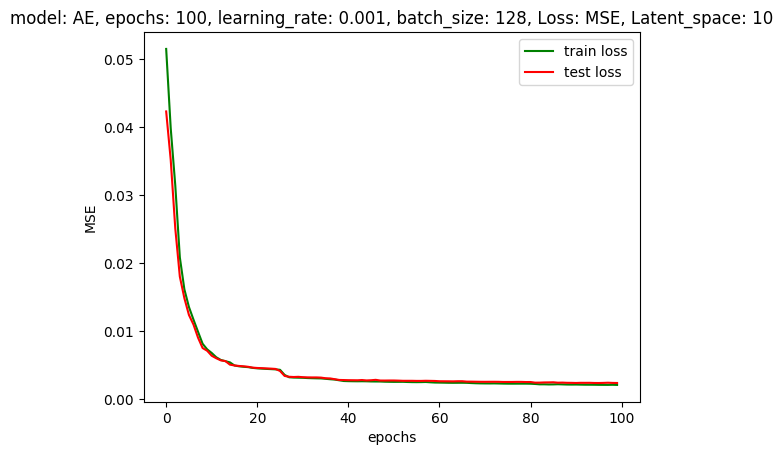

In [4]:
nn.plot_loss()

In [14]:
test = pd.read_csv("../qmof_datasets/test.csv", index_col=0)
train = pd.read_csv("../qmof_datasets/train.csv", index_col=0)

In [15]:
test_reduced = pd.DataFrame(nn.transform(test))

In [17]:
corr_matrix = pd.DataFrame(columns=test_reduced.columns)

for c in test.columns:
    row = [0.]*10
    for j in range(10):
        row[j] = np.corrcoef(test[c], test_reduced[j])[0, 1]
        if np.isnan(row[j]):
            print(c)
    corr_matrix.loc[c] = row

In [18]:
corr_matrix

,0,1,2,3,4,5,6,7,8,9
pld,0.430424,-0.086318,-0.285312,-0.142030,-0.254486,0.241913,-0.016444,-0.224109,-0.463418,-0.182036
lcd,0.449480,-0.137646,-0.266846,-0.139774,-0.210329,0.242031,-0.062970,-0.191994,-0.485140,-0.196055
a,0.325016,-0.168328,-0.216890,-0.178604,-0.103467,0.008043,-0.117510,-0.035005,-0.295318,0.007975
b,0.477399,-0.121164,-0.257065,-0.161915,-0.238099,0.100583,0.029803,-0.251658,-0.500514,-0.109168
c,0.431031,-0.163777,-0.241790,-0.177374,-0.274146,0.133251,0.001776,-0.245066,-0.437055,-0.070755
...,...,...,...,...,...,...,...,...,...,...
Atomic_Weight,-0.132085,0.083846,0.090111,0.054492,0.162829,-0.195143,0.151107,0.074029,0.156326,0.089205
Atomic Radius,-0.142096,0.006564,0.151984,0.164292,0.222988,-0.128471,0.144733,0.005426,0.156983,-0.066900
Mulliken EN,-0.096424,0.181115,-0.149238,-0.193928,0.006152,-0.254247,-0.045865,0.229149,0.131234,0.301910
polarizability(A^3),-0.056625,-0.104815,0.168647,0.205767,0.163404,0.076185,0.103532,-0.122170,0.045128,-0.211275


In [19]:
import matplotlib.pyplot as plt

In [24]:
max_corr = corr_matrix[corr_matrix.abs() > 0.1]

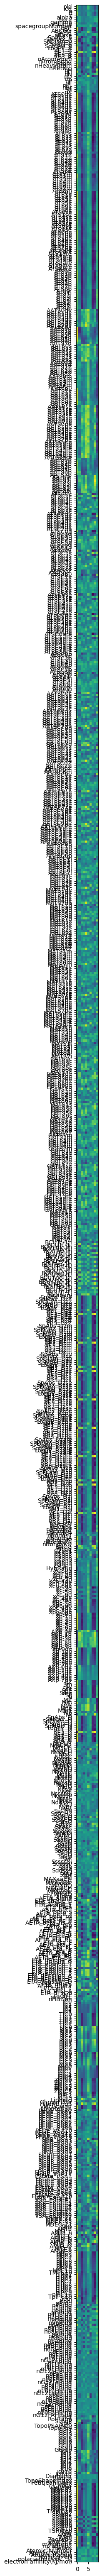

In [25]:

fig, ax = plt.subplots(1, 1,figsize=(5, 5*16))

ax.imshow(corr_matrix.values)
t = ax.set_yticks(range(len(corr_matrix)), corr_matrix.index)